In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from skimage import data, util, exposure, color

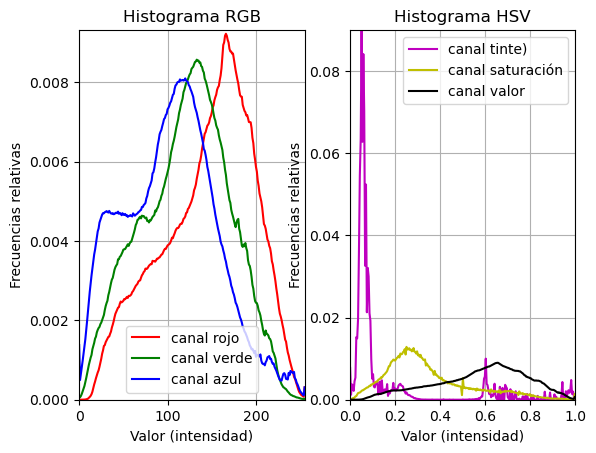

In [4]:
file = 'images/breastXray.tif'
img  = Image.open(file)
img_np = np.array(img)

img_RGB = Image.open('images/PerroBoston.jpg')
imgRGB_np = np.array(img_RGB)
img_hist, bins = exposure.histogram(imgRGB_np, channel_axis=2, normalize=True)
M = img_hist.max()

plt.subplot(121)
plt.plot(bins, img_hist[0,:],'r', label='canal rojo')
plt.plot(bins, img_hist[1,:],'g', label='canal verde')
plt.plot(bins, img_hist[2,:],'b', label='canal azul')

plt.axis([0,255, 0, 1.01*img_hist.max()])
plt.legend()
plt.title('Histograma RGB')
plt.xlabel('Valor (intensidad)')
plt.ylabel('Frecuencias relativas')
plt.grid()



plt.subplot(122)
img_hsv = color.rgb2hsv(imgRGB_np)

img_hist, bins = exposure.histogram(img_hsv, channel_axis=2, normalize=True)

plt.plot(bins, img_hist[0,:],'m', label='canal tinte)')
plt.plot(bins, img_hist[1,:],'y', label='canal saturación')
plt.plot(bins, img_hist[2,:],'k', label='canal valor')

plt.axis([0,1, 0, img_hist.max()])
plt.legend()
plt.title('Histograma HSV')
plt.xlabel('Valor (intensidad)')
plt.ylabel('Frecuencias relativas')
plt.grid()



In [5]:
file = 'images/breastXray.tif'

img  = Image.open(file)

exposure.is_low_contrast(img,  fraction_threshold=0.2)

False

Tipo de datos:  uint8
Tamaño de imagen (filas, columnas):  (571, 482)
Númro de píxels:  275222
Imagen: 
Valor mínimo:  21 	Valor máximo:  255
Imagen inversa: 
Valor mínimo:  0 	Valor máximo:  234


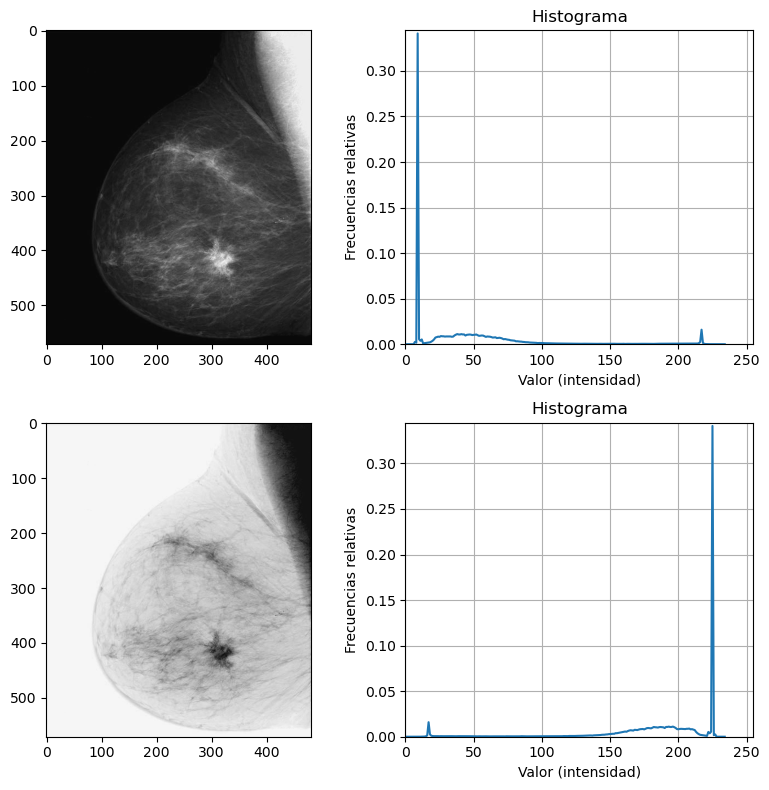

In [7]:
file = 'images/breastXray.tif'

img  = Image.open(file)
img_np = np.array(img) 
img_inv = util.invert(img_np)
print('Tipo de datos: ', img_np.dtype)
print('Tamaño de imagen (filas, columnas): ', img_np.shape)
print('Númro de píxels: ', img_np.size)
print('Imagen: \nValor mínimo: ', img_np.min(), '\tValor máximo: ', img_np.max())
print('Imagen inversa: \nValor mínimo: ', img_inv.min(), '\tValor máximo: ', img_inv.max())

img_hist, bins = exposure.histogram(img_np, normalize=True)
img_inv_hist, bins = exposure.histogram(img_inv, normalize=True)

plt.figure(figsize=(8, 8))

plt.subplot(221)
plt.imshow(img_np, cmap='gray')

plt.subplot(222)
plt.plot(bins, img_hist)
plt.axis([0,255, 0, 1.01*img_hist.max()])
plt.title('Histograma')
plt.xlabel('Valor (intensidad)')
plt.ylabel('Frecuencias relativas')
plt.grid()

plt.subplot(223)
plt.imshow(img_inv, cmap='gray')

plt.subplot(224)
plt.plot(bins, img_inv_hist)
plt.axis([0,255, 0, 1.01*img_hist.max()])
plt.title('Histograma')
plt.xlabel('Valor (intensidad)')
plt.ylabel('Frecuencias relativas')
plt.grid()

plt.tight_layout()

In [10]:
def transformacionInvertida (file):
    img  = Image.open(file)
    img_np = np.array(img) 
    img_inv = util.invert(img_np)
    print('Tipo de datos: ', img_np.dtype)
    print('Tamaño de imagen (filas, columnas): ', img_np.shape)
    print('Númro de píxels: ', img_np.size)
    print('Imagen: \nValor mínimo: ', img_np.min(), '\tValor máximo: ', img_np.max())
    print('Imagen inversa: \nValor mínimo: ', img_inv.min(), '\tValor máximo: ', img_inv.max())

    img_hist, bins = exposure.histogram(img_np, normalize=True)
    img_inv_hist, bins = exposure.histogram(img_inv, normalize=True)

    plt.figure(figsize=(8, 8))

    plt.subplot(221)
    plt.imshow(img_np, cmap='gray')

    plt.subplot(222)
    plt.plot(bins, img_hist)
    plt.axis([0,255, 0, 1.01*img_hist.max()])
    plt.title('Histograma')
    plt.xlabel('Valor (intensidad)')
    plt.ylabel('Frecuencias relativas')
    plt.grid()

    plt.subplot(223)
    plt.imshow(img_inv, cmap='gray')

    plt.subplot(224)
    plt.plot(bins, img_inv_hist)
    plt.axis([0,255, 0, 1.01*img_hist.max()])
    plt.title('Histograma')
    plt.xlabel('Valor (intensidad)')
    plt.ylabel('Frecuencias relativas')
    plt.grid()

    plt.tight_layout()

Tipo de datos:  uint8
Tamaño de imagen (filas, columnas):  (571, 482)
Númro de píxels:  275222
Imagen: 
Valor mínimo:  21 	Valor máximo:  255
Imagen inversa: 
Valor mínimo:  0 	Valor máximo:  234


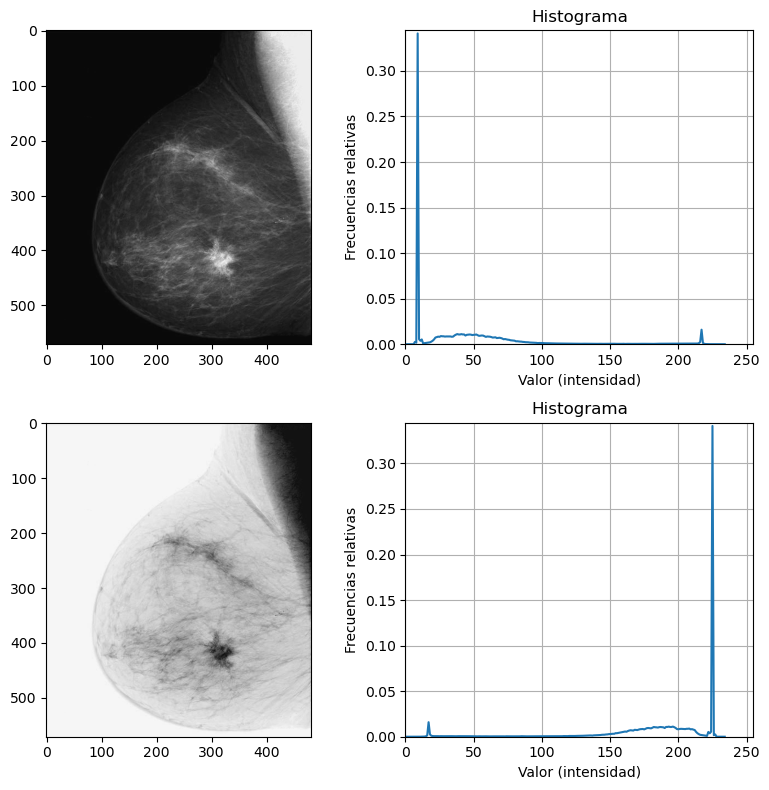

In [11]:
transformacionInvertida('images/breastXray.tif')

Tipo de datos:  uint8
Tamaño de imagen (filas, columnas):  (889, 889)
Número de píxels:  790321
Imagen: 
Valor mínimo:  91 	Valor máximo:  138
Valor mediano:  109.08651168322744


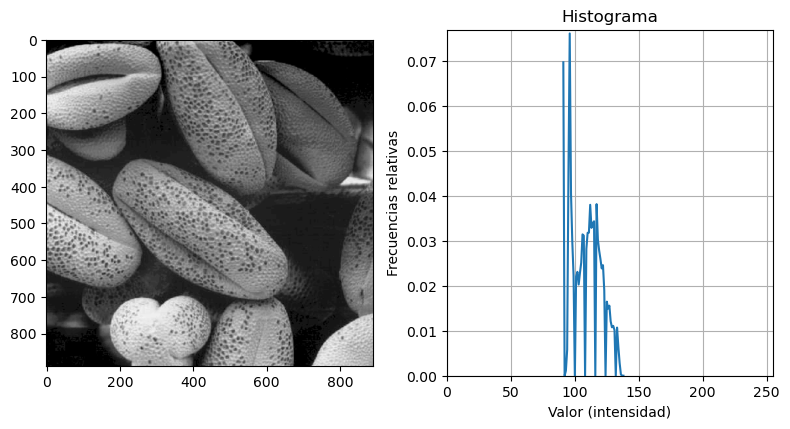

In [15]:

img  = Image.open('images/washed_pollen.tif')
img_np = np.array(img) 

print('Tipo de datos: ', img_np.dtype)
print('Tamaño de imagen (filas, columnas): ', img_np.shape)
print('Número de píxels: ', img_np.size)
print('Imagen: \nValor mínimo: ', img_np.min(), '\tValor máximo: ', img_np.max())
print('Valor mediano: ', img_np.mean())

img_hist, bins = exposure.histogram(img_np, normalize=True)

plt.figure(figsize=(8, 8))

plt.subplot(221)
plt.imshow(img, cmap='gray')

plt.subplot(222)
plt.plot(bins, img_hist)
plt.axis([0,255, 0, 1.01*img_hist.max()])
plt.title('Histograma')
plt.xlabel('Valor (intensidad)')
plt.ylabel('Frecuencias relativas')
plt.grid()

plt.tight_layout()

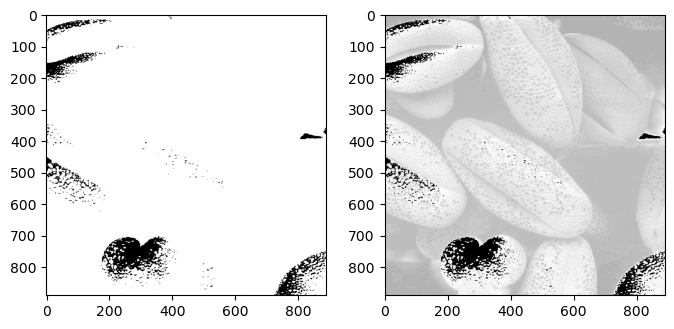

In [13]:
th_0, th_1 = 80, 130

mask = np.logical_and(img_np > th_0, img_np < th_1)

img_seg = img_np*mask

plt.figure(figsize=(8, 8))

plt.subplot(221)
plt.imshow(mask, cmap='gray')

plt.subplot(222)
plt.imshow(img_seg, cmap='gray')

Tipo de datos:  uint8
Tamaño de imagen (filas, columnas):  (800, 500)
Número de píxels:  400000
Imagen: 
Valor mínimo:  0 	Valor máximo:  255
Valor mediano:  17.2210775


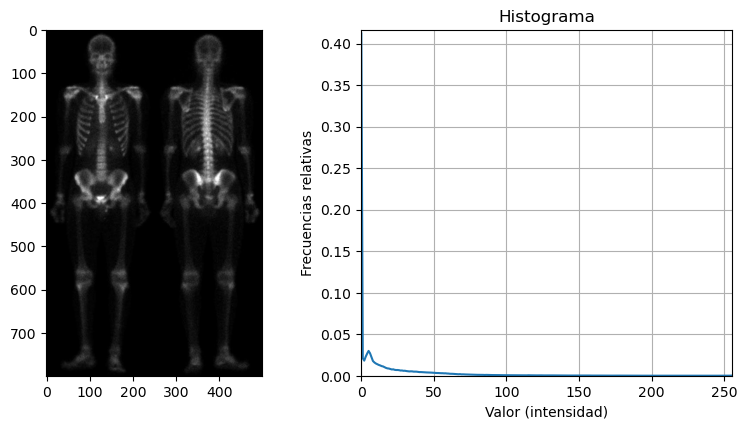

In [17]:
img  = Image.open('images/skeleton.tif')
img_np = np.array(img, dtype = 'uint8') #Lo convertimos a numPy y mantenemos 8 bits por pixel de enteros, si fueramos a trabajar con cálculos pasaríamos a flotante.
type(img_np) #Aquí ya vemos que es una imagen numpy


print('Tipo de datos: ', img_np.dtype)
print('Tamaño de imagen (filas, columnas): ', img_np.shape)
print('Número de píxels: ', img_np.size)
print('Imagen: \nValor mínimo: ', img_np.min(), '\tValor máximo: ', img_np.max())
print('Valor mediano: ', img_np.mean())

img_hist, bins = exposure.histogram(img_np, normalize=True)

plt.figure(figsize=(8, 8))

plt.subplot(221)
plt.imshow(img, cmap='gray')

plt.subplot(222)
plt.plot(bins, img_hist)
plt.axis([0,255, 0, 1.01*img_hist.max()])
plt.title('Histograma')
plt.xlabel('Valor (intensidad)')
plt.ylabel('Frecuencias relativas')
plt.grid()

plt.tight_layout()

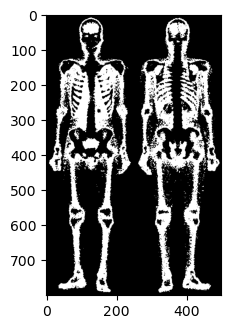

In [20]:
th_0, th_1 = 10, 50

mask = np.logical_and(img_np > th_0, img_np < th_1)

img_seg = img_np*mask

plt.figure(figsize=(8, 8))

plt.subplot(221)
plt.imshow(mask, cmap='gray')

Tipo de datos:  uint8
Tamaño de imagen (filas, columnas):  (3024, 4032, 3)
Número de píxels:  36578304
Imagen: 
Valor mínimo:  0 	Valor máximo:  255
Valor mediano:  123.00402079877733


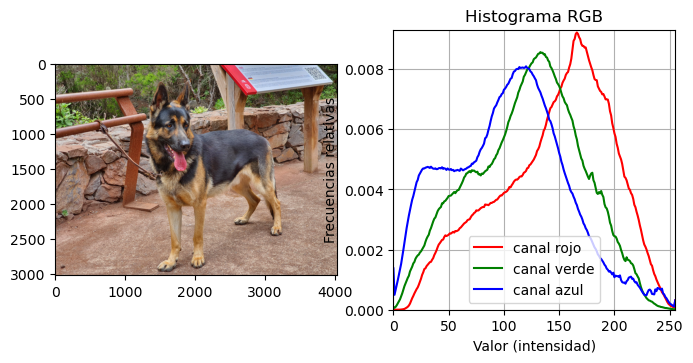

In [28]:
img  = Image.open('images/PerroBoston.jpg')
imgRGB_np = np.array(img, dtype = 'uint8') #Lo convertimos a numPy y mantenemos 8 bits por pixel de enteros, si fueramos a trabajar con cálculos pasaríamos a flotante.
type(img_np) #Aquí ya vemos que es una imagen numpy


print('Tipo de datos: ', img_np.dtype)
print('Tamaño de imagen (filas, columnas): ', img_np.shape)
print('Número de píxels: ', img_np.size)
print('Imagen: \nValor mínimo: ', img_np.min(), '\tValor máximo: ', img_np.max())
print('Valor mediano: ', img_np.mean())

img_hist, bins = exposure.histogram(imgRGB_np, channel_axis=2, normalize=True)
M = img_hist.max()

plt.figure(figsize=(8, 8))

plt.subplot(221)
plt.imshow(img, cmap='gray')

plt.subplot(222)
plt.plot(bins, img_hist[0,:],'r', label='canal rojo')
plt.plot(bins, img_hist[1,:],'g', label='canal verde')
plt.plot(bins, img_hist[2,:],'b', label='canal azul')

plt.axis([0,255, 0, 1.01*img_hist.max()])
plt.legend()
plt.title('Histograma RGB')
plt.xlabel('Valor (intensidad)')
plt.ylabel('Frecuencias relativas')
plt.grid()

